<a href="https://colab.research.google.com/github/w4bo/handsOnDataPipelines/blob/main/01-MachineLearning/03-Iris.solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `Diabetes` challenge

### Goal

It is your job to predict the `Outcome` of diabetes for each patient. 

### TODO

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

You are asked to fulfill the following steps.

1. Feature pre-processing (e.g., remove useless features, impute missing values, encode some features)
2. Verify the distribution of "Outcome" values
3. Check pairwise correlations among features
4. Split training and test data. When splitting train and test datasets, the test dataset should contain 30% of the data.
5. Plot the test dataset in 2D, are the outcomes separated?
6. Train at least two ML classification models; submissions are evaluated using the accuracy score.
7. Perform hyper-parameter optimization for at least one model

In [1]:
# Briefly explain the overall steps of your solution (e.g., what did you do and why).
# Briefly write the extracted outcome/insights of each of the previous points here. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy.stats import randint
import seaborn as sns
from sklearn import metrics

# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

df = pd.read_csv("datasets/diabetes.mod.csv")

In [3]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Y
1,1,1,85,66,29,0,26.6,0.351,31,N
2,2,8,183,64,0,0,23.3,0.672,32,Y
3,3,1,89,66,23,94,28.1,0.167,21,N
4,4,0,137,40,35,168,43.1,2.288,33,Y
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,N
764,764,2,122,70,27,0,36.8,0.340,27,N
765,765,5,121,72,23,112,26.2,0.245,30,N
766,766,1,126,60,0,0,30.1,0.349,47,Y


In [4]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,755.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992450,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.951837,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       755 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


Remove useless columns

In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)

Encode the variables

In [7]:
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == "Y" else 0)

Fill out the missing values with the mean

In [8]:
df["BMI"].replace(np.nan, df["BMI"].mean(), inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checkout the label distribution

C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

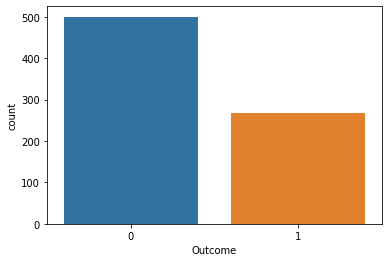

In [10]:
sns.countplot(df['Outcome'], label="Count")

Check pairwise correlations among variables

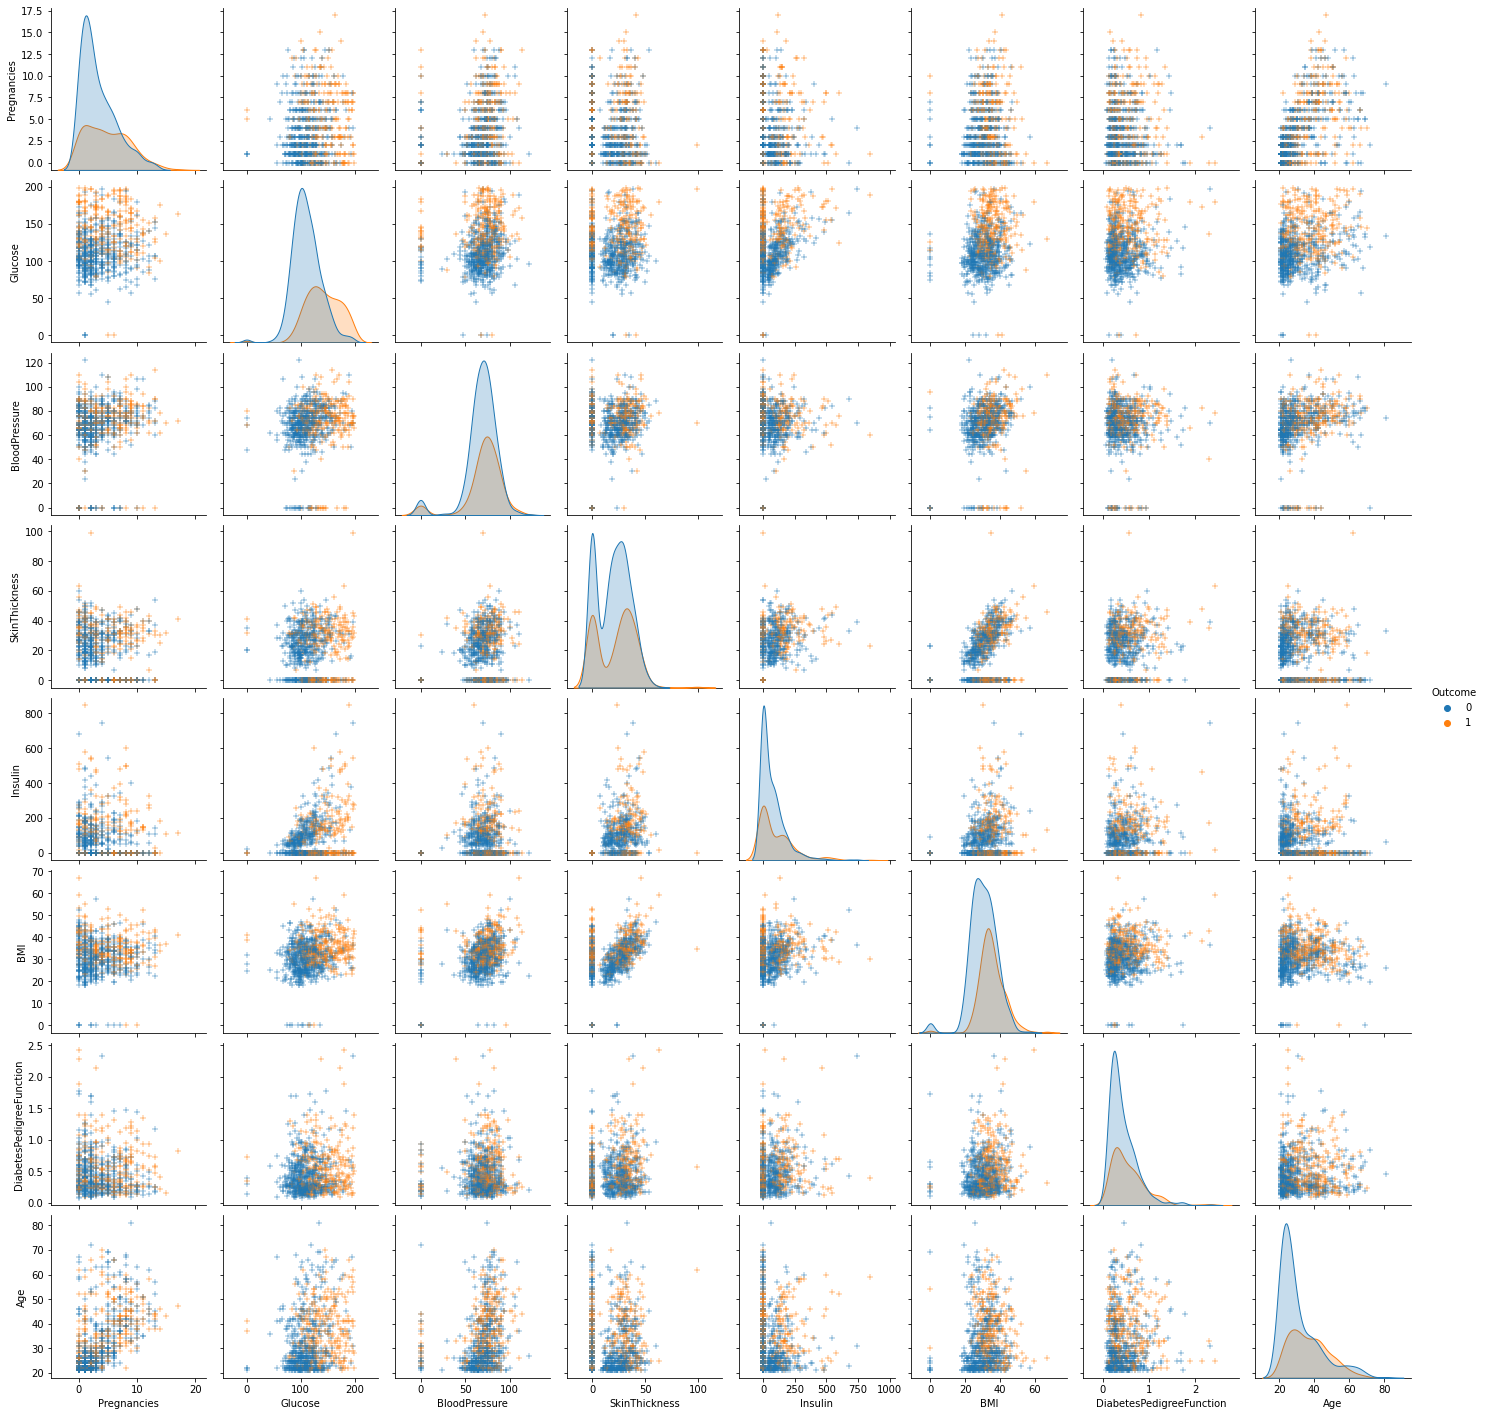

In [11]:
g = sns.pairplot(df, hue='Outcome', markers='+')
plt.show()

Split training and test data

In [12]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


Plot data into 2D

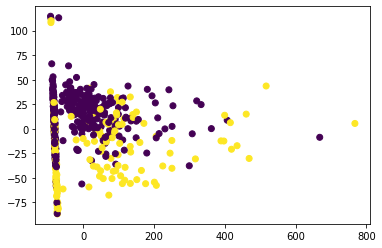

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

plt.scatter(
    x=result[:,0], 
    y=result[:,1] , 
    c=y_train,
    cmap='viridis'
)

C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\matteo.francia5\Documents\repos\teaching-handsondatapipelines\01-MachineLearning\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


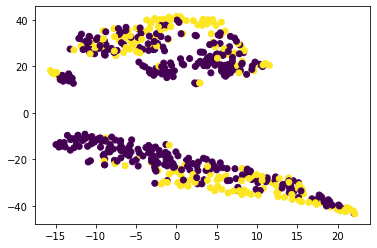

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
result = tsne.fit_transform(X_train.head(2000))

plt.scatter(
    x=result[:,0], 
    y=result[:,1] , 
    c=y_train,
    cmap='viridis'
)

Training k-NN

0.7445887445887446


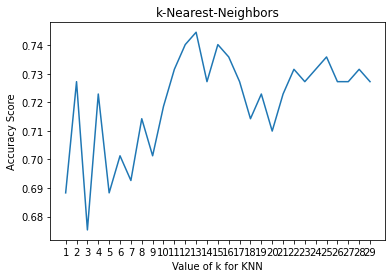

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
def fit_knn(X_train, y_train, X_test, y_test):
    k_range = list(range(1, 30))
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    print(max(scores))
    plt.plot(k_range, scores)
    plt.xticks(k_range)
    plt.xlabel('Value of k for KNN')
    plt.ylabel('Accuracy Score')
    plt.title('k-Nearest-Neighbors')
    plt.show()
    return y_pred

fit_knn(X_train, y_train, X_test, y_test)

Training a random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier # import the model

def run_forest(n_estimators, max_features):
    # initialize the model (i.e., the estimator)
    forest = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)
    forest.fit(X_train, y_train) # train it
    y_pred = forest.predict(X_test) # predict the cost of houses in the test set
    print(metrics.accuracy_score(y_test, y_pred))
    return y_pred
run_forest(100, "auto")

0.7532467532467533


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Random search optimization

In [17]:
from sklearn.model_selection import RandomizedSearchCV # for tuning parameter
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 9, None],
    'min_samples_split': range(2, 11),
    'bootstrap': [True, False],
}

# lets Make a function for Grid Search CV
def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = RandomizedSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=2)
    clf.fit(X_train, y_train)
    print("The best estimator is " + str(clf.best_estimator_))
    print("The best score is " + str(clf.best_score_))

gridsearch_cv(model, param_grid, X, y)

The best estimator is RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=6)
The best score is 0.7800186741363212
